In [1]:
import numpy as np
import matplotlib.pyplot as pl
import sbpd_func as ib
import progressbar as pb
#pl.style.use('dark_background')

In [2]:
savefigs = 1

np.random.seed(6)

#n is the dimension of the simplex
n = 250
#m is the dimension of the observation Ax
m = 250

#regularization strength for TV regularizer
beta = 1

itera = int(1000000)
itera2 = int(8 * itera / 10)

x0 = (1. / n) * np.ones(n)

mu0 = np.zeros(n - 1)

A = np.random.rand(m, n) + 0.01
for i in range(n):
    Atotal = A[:,i].sum()
    A[:,i] = A[:,i]/Atotal
#for i in range(n):
#    A[:,i] = np.random.dirichlet(np.ones(m), size=1)
#A = np.identity(n)

Lp = 0
for i in range(A.shape[1]):
    Lp = np.maximum(Lp, A[:,i].sum())

y = np.random.rand(m)
#y = np.random.dirichlet(np.ones(m), size=1)[0]

#upper bound for the operator norm of nabla
nablanorm = 2.01

prim_size = 1. / (Lp + nablanorm)
dual_size = 1. / nablanorm

loopcounter = pb.progressbar(range(itera))
argdict = {'primalsize':prim_size, 'dualsize':dual_size, 'infballrad':beta, 'y':y, 'A':A, 'xsol':x0, 'musol':mu0, 'lagrangian':0, 'loopcounter':loopcounter, 'stochastic':0}

In [3]:
argdict['xsol'], argdict['musol'], throw_val, throw_val2 = ib.ibpd(itera, x0, mu0, ib.shanbolt_grad, ib.id_map, ib.exp_regularize, ib.inf_ball_proj, ib.lin_inv_simp_gradf, ib.zero_map, ib.lin_inv_simp_linop, ib.lin_inv_simp_linopT, ib.lin_inv_simp_lagr_x, ib.lin_inv_simp_lagr_mu, argdict)

100% (1000000 of 1000000) |##############| Elapsed Time: 0:01:00 Time:  0:01:00


In [ ]:
#pl.plot(np.dot(A, argdict['xsol']), label='Ax')
#pl.plot(y, label='y')
#pl.legend()
#pl.show()
#pl.plot(argdict['xsol'], label='x')
#pl.title('graph of x')
#pl.show()
#pl.plot(argdict['musol'])
#pl.title('graph of mu')
#pl.show()

In [4]:
argdict['lagrangian'] = 1
argdict['stochastic'] = 0
argdict['loopcounter'] = pb.progressbar(range(itera2))
argdict['linopTmusol'] = ib.lin_inv_simp_linopT(argdict['musol'], argdict)
argdict['linopxsol'] = ib.lin_inv_simp_linop(argdict['xsol'], argdict)
argdict['fxsol'] = ib.lin_inv_simp_f(argdict['xsol'], argdict)
throwx, throwmu, erglagr_vals, pwlagr_vals = ib.ibpd(itera2, x0, mu0, ib.shanbolt_grad, ib.id_map, ib.exp_regularize, ib.inf_ball_proj, ib.lin_inv_simp_gradf, ib.zero_map, ib.lin_inv_simp_linop, ib.lin_inv_simp_linopT, ib.lin_inv_simp_lagr_x, ib.lin_inv_simp_lagr_mu, argdict)

100% (800000 of 800000) |################| Elapsed Time: 0:01:17 Time:  0:01:17


In [5]:
#calculate the constant from the ergodic rate
CONST = (1. / argdict['primalsize']) * ib.kldiv(argdict['xsol'], x0) + (1. / argdict['dualsize']) * 0.5 * (np.linalg.norm(argdict['musol'] - mu0) ** 2) - np.dot(ib.lin_inv_simp_linop(argdict['xsol'] - x0), argdict['musol'] - mu0)

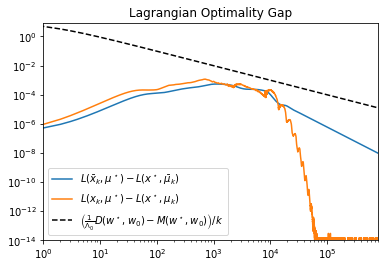

In [6]:
pl.plot(erglagr_vals, label=r'$L(\bar{x}_k,\mu^\star) - L(x^\star, \bar{\mu}_k)$')
pl.plot(pwlagr_vals, label=r'$L(x_k,\mu^\star) - L(x^\star, \mu_k)$')
pl.plot((CONST) / ((np.array(range(itera2)) + 1)), 'k--', label=r'$\left(\frac{1}{\Lambda_0}D(w^\star,w_0)-M(w^\star,w_0)\right)/k$')
pl.xlim((1e0, itera2))
pl.ylim((1e-14, 9e0))
pl.xscale('log')
pl.yscale('log')
pl.title('Lagrangian Optimality Gap')
pl.legend(loc='lower left')
if savefigs == 1:
    pl.savefig('LinInvSimp_colStoch.eps', bbox_inches='tight')
pl.show()

In [7]:
#Generate the lagrangian values for 20 runs of each batch size and save to a npy file

batchsize = [int(.25 * m), int(.5* m), int(.75 * m), int(.9 * m)]
for batch in batchsize:
    argdict['batchsize'] = batch
    for run in range(20):
        argdict['loopcounter'] = pb.progressbar(range(itera2))
        argdict['stochastic'] = 1
        throwx, throwmu, erglagr_vals, pwlagr_vals = ib.ibpd(itera2, x0, mu0, ib.shanbolt_grad, ib.id_map, ib.exp_regularize, ib.inf_ball_proj, ib.stoch_lin_inv_simp_gradf, ib.zero_map, ib.lin_inv_simp_linop, ib.lin_inv_simp_linopT, ib.lin_inv_simp_lagr_x, ib.lin_inv_simp_lagr_mu, argdict)
        tosave = [pwlagr_vals, erglagr_vals, CONST]
        np.save('npdata_colStoch'+str(batch)+'-'+str(run)+'.npy', tosave)

100% (800000 of 800000) |################| Elapsed Time: 0:01:54 Time:  0:01:54
100% (800000 of 800000) |################| Elapsed Time: 0:01:59 Time:  0:01:59
100% (800000 of 800000) |################| Elapsed Time: 0:02:02 Time:  0:02:02
100% (800000 of 800000) |################| Elapsed Time: 0:02:12 Time:  0:02:12
100% (800000 of 800000) |################| Elapsed Time: 0:02:07 Time:  0:02:07
100% (800000 of 800000) |################| Elapsed Time: 0:02:02 Time:  0:02:02
100% (800000 of 800000) |################| Elapsed Time: 0:01:54 Time:  0:01:54
100% (800000 of 800000) |################| Elapsed Time: 0:01:55 Time:  0:01:55
100% (800000 of 800000) |################| Elapsed Time: 0:01:55 Time:  0:01:55
100% (800000 of 800000) |################| Elapsed Time: 0:02:20 Time:  0:02:20
100% (800000 of 800000) |################| Elapsed Time: 0:02:12 Time:  0:02:12
100% (800000 of 800000) |################| Elapsed Time: 0:02:10 Time:  0:02:10
100% (800000 of 800000) |###############

In [ ]:
#Generate the lagrangian values for a single run of each batch size and save to a npy file

batchsize = [int(.25 * m), int(.5* m), int(.75 * m), int(.9 * m)]
for batch in batchsize:
    argdict['batchsize'] = batch
    argdict['loopcounter'] = pb.progressbar(range(itera2))
    argdict['stochastic'] = 1
    throwx, throwmu, erglagr_vals, pwlagr_vals = ib.ibpd(itera2, x0, mu0, ib.shanbolt_grad, ib.id_map, ib.exp_regularize, ib.inf_ball_proj, ib.stoch_lin_inv_simp_gradf, ib.zero_map, ib.lin_inv_simp_linop, ib.lin_inv_simp_linopT, ib.lin_inv_simp_lagr_x, ib.lin_inv_simp_lagr_mu, argdict)
    tosave = [pwlagr_vals, erglagr_vals, CONST]
    np.save('npdata_colStoch'+str(batch)+'.npy', tosave)

In [ ]:
#Plots the Lagrangian Optimality gap for a single run of each batch size

batchsize = [int(.25 * m), int(.5* m), int(.75 * m), int(.9 * m)]
batchcounter = 0
for batch in batchsize:
    colorstr = 'C'+str(batchcounter)
    pwlagr_vals, erglagr_vals, CONST = np.load('npdata'+str(batch)+'.npy')
    pl.plot(erglagr_vals, color=colorstr label=r'Batch = '+str(batch))
    batchcounter += 1
pl.plot((CONST) / ((np.array(range(itera2)) + 1)), 'k--', label=r'$O(1/k)$')
pl.xscale('log')
pl.yscale('log')
pl.title('Ergodic Lagrangian Gap (Sampled)')
pl.xlim((1e1, itera2))
pl.ylim((1e-3, 1e2))
pl.legend(loc='lower left')
if savefigs == 1:
    pl.savefig('StochLinInvSimpBatch_colStoch.eps', bbox_inches='tight')
pl.show()

C:\Users\Tony\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


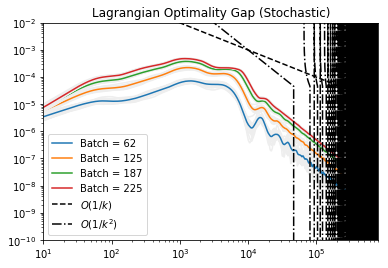

In [19]:
#Plots the Lagrangian Optimality gap for many runs of each batch size (to estimate the expectation)

batchsize = [int(.25 * m), int(.5* m), int(.75 * m), int(.9 * m)]
batchcounter = 0
for batch in batchsize:
    expectation = np.zeros(800000)
    colorstr = 'C'+str(batchcounter)
    for run in range(20):
        throwaway, ergvals, CONST = np.load('../../../ibpd_np_data/npdata_colStoch'+str(batch)+'-'+str(run)+'.npy')
        pl.plot(ergvals, color='#eeeeee')
        expectation += ergvals / 20
    pl.plot(expectation, color=colorstr, label='Batch = '+str(batch))
    batchcounter += 1
pl.xscale('log')
pl.yscale('log')
pl.title('Lagrangian Optimality Gap (Stochastic)')
pl.xlim((1e1, itera2))
pl.ylim((1e-10, 1e-2))
#pl.xlim([10, 20])
#pl.ylim([9,10.05])
pl.plot((CONST) / ((np.array(range(itera2)) + 1)), 'k--', label=r'$O(1/k)$')
ksquareplot = ((np.array(range(itera2)) + 2) ** 2) / 1e4
pl.plot((CONST) / ksquareplot, 'k-.', label=r'$O(1/k^2)$')
pl.legend(loc='lower left')
pl.savefig('StochLinInvSimpBatchLight_colStoch.eps', bbox_inches='tight')
pl.show()